## **Разведочный анализ данных. Исследование и визуализация данных.**

### **1) Текстовое описание набора данных**

В качестве набора данных мы будем использовать набор данных по распознаванию вин - https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data. Эти данные являются результатами химического анализа вин, выращенных в одном регионе Италии тремя разными производителями. Проведено тринадцать различных измерений для различных компонентов, обнаруженных в трех типах вина. 

Файл содержит следующие колонки:

- Алкоголь
- Яблочная кислота
- Пепел
- Щелочность зоны
- Магний
- Общее количество фенолов
- Флавоноиды
- Нефлавоноидные фенолы
- Проантоцианы
- Интенсивность цвета
- Оттенок
- OD280/OD315 разбавленных вин
- Пролин

### **Импорт библиотек**

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### **Загрузка данных**

Загрузим файл датасета из https://scikit-learn.org/stable/datasets/toy_dataset.html:


In [10]:
from sklearn import datasets
wine = datasets.load_wine()

Создадим датафрейм wine_df в библиотеке Pandas на основе загруженного файла:

In [15]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

### **2) Основные характеристики датасета**

In [16]:
# Первые пять строк датасета
wine_df.head()

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 
 
 
 
 0 
 14.23 
 1.71 
 2.43 
 15.6 
 127.0 
 2.80 
 3.06 
 0.28 
 2.29 
 5.64 
 1.04 
 3.92 
 1065.0 
 
 
 1 
 13.20 
 1.78 
 2.14 
 11.2 
 100.0 
 2.65 
 2.76 
 0.26 
 1.28 
 4.38 
 1.05 
 3.40 
 1050.0 
 
 
 2 
 13.16 
 2.36 
 2.67 
 18.6 
 101.0 
 2.80 
 3.24 
 0.30 
 2.81 
 5.68 
 1.03 
 3.17 
 1185.0 
 
 
 3 
 14.37 
 1.95 
 2.50 
 16.8 
 113.0 
 3.85 
 3.49 
 0.24 
 2.18 
 7.80 
 0.86 
 3.45 
 1480.0 
 
 
 4 
 13.24 
 2.59 
 2.87 
 21.0 
 118.0 
 2.80 
 2.69 
 0.39 
 1.82 
 4.32 
 1.04 
 2.93 
 735.0

In [17]:
# Размер датасета - 178 строк, 13 колонок
wine_df.shape

(178, 13)

In [18]:
total_count = wine_df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 178


In [19]:
# Список колонок
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [20]:
# Список колонок с типами данных
wine_df.dtypes

alcohol float64
malic_acid float64
ash float64
alcalinity_of_ash float64
magnesium float64
total_phenols float64
flavanoids float64
nonflavanoid_phenols float64
proanthocyanins float64
color_intensity float64
hue float64
od280/od315_of_diluted_wines float64
proline float64
dtype: object

In [21]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in wine_df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = wine_df[wine_df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0


In [22]:
# Основные статистические характеристки набора данных
wine_df.describe()

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 
 
 
 
 count 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 
 
 mean 
 13.000618 
 2.336348 
 2.366517 
 19.494944 
 99.741573 
 2.295112 
 2.029270 
 0.361854 
 1.590899 
 5.058090 
 0.957449 
 2.611685 
 746.893258 
 
 
 std 
 0.811827 
 1.117146 
 0.274344 
 3.339564 
 14.282484 
 0.625851 
 0.998859 
 0.124453 
 0.572359 
 2.318286 
 0.228572 
 0.709990 
 314.907474 
 
 
 min 
 11.030000 
 0.740000 
 1.360000 
 10.600000 
 70.000000 
 0.980000 
 0.340000 
 0.130000 
 0.410000 
 1.280000 
 0.480000 
 1.270000 
 278.000000 
 
 
 25% 
 12.362500 
 1.602500 
 2.210000 
 17.200000 
 88.000000 
 1.742500 
 1.205000 
 0.270000 
 1.250000 
 3.220000 
 0.782500 
 1.937500 
 500.500000 
 
 
 50% 
 13.050000 
 1.865000 
 2.360000 
 19.500000 
 98.000000 
 2.355000 
 2.135000 
 0.340000 
 1.555000 
 4.690000 
 0.965000 
 2.780000 
 673.500000 
 
 
 75% 
 13.677500 
 3.082500 
 2.557500 
 21.500000 
 107.000000 
 2.800000 
 2.875000 
 0.437500 
 1.950000 
 6.200000 
 1.120000 
 3.170000 
 985.000000 
 
 
 max 
 14.830000 
 5.800000 
 3.230000 
 30.000000 
 162.000000 
 3.880000 
 5.080000 
 0.660000 
 3.580000 
 13.000000 
 1.710000 
 4.000000 
 1680.000000

In [24]:
# Определим уникальные значения для пепела
wine_df['ash'].unique()

array([2.43, 2.14, 2.67, 2.5 , 2.87, 2.45, 2.61, 2.17, 2.27, 2.3 , 2.32,
 2.41, 2.39, 2.38, 2.7 , 2.72, 2.62, 2.48, 2.56, 2.28, 2.65, 2.36,
 2.52, 3.22, 2.8 , 2.21, 2.84, 2.55, 2.1 , 2.51, 2.31, 2.12, 2.59,
 2.29, 2.44, 2.4 , 2.04, 2.6 , 2.42, 2.68, 2.25, 2.46, 1.36, 2.02,
 1.92, 2.16, 2.53, 1.7 , 1.75, 2.24, 1.71, 2.23, 1.95, 2. , 2.2 ,
 2.58, 2.26, 2.22, 2.74, 1.98, 1.9 , 1.88, 1.94, 1.82, 2.92, 1.99,
 2.19, 3.23, 2.73, 2.13, 2.78, 2.54, 2.64, 2.35, 2.15, 2.75, 2.69,
 2.86, 2.37])

### **3) Визуальное исследование датасета**

### **Диаграмма рассеивания**

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='alcohol', ylabel='magnesium'>

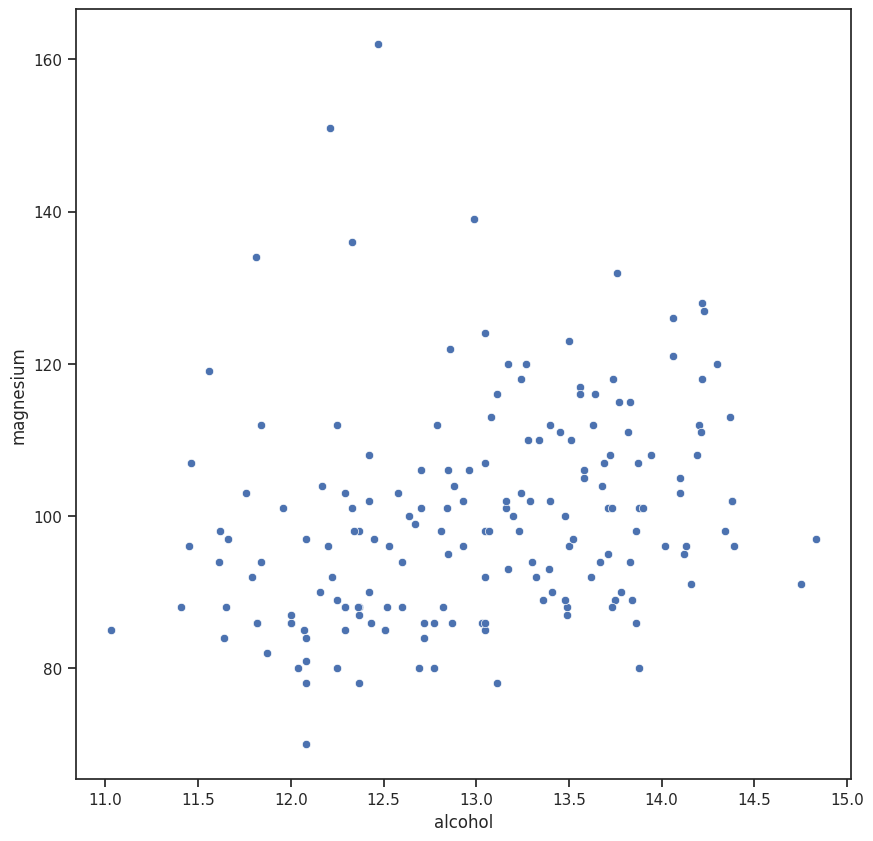

In [29]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='magnesium', data=wine_df)

Посмотрим насколько на эту зависимость влияет пепел:

<Axes: xlabel='alcohol', ylabel='magnesium'>

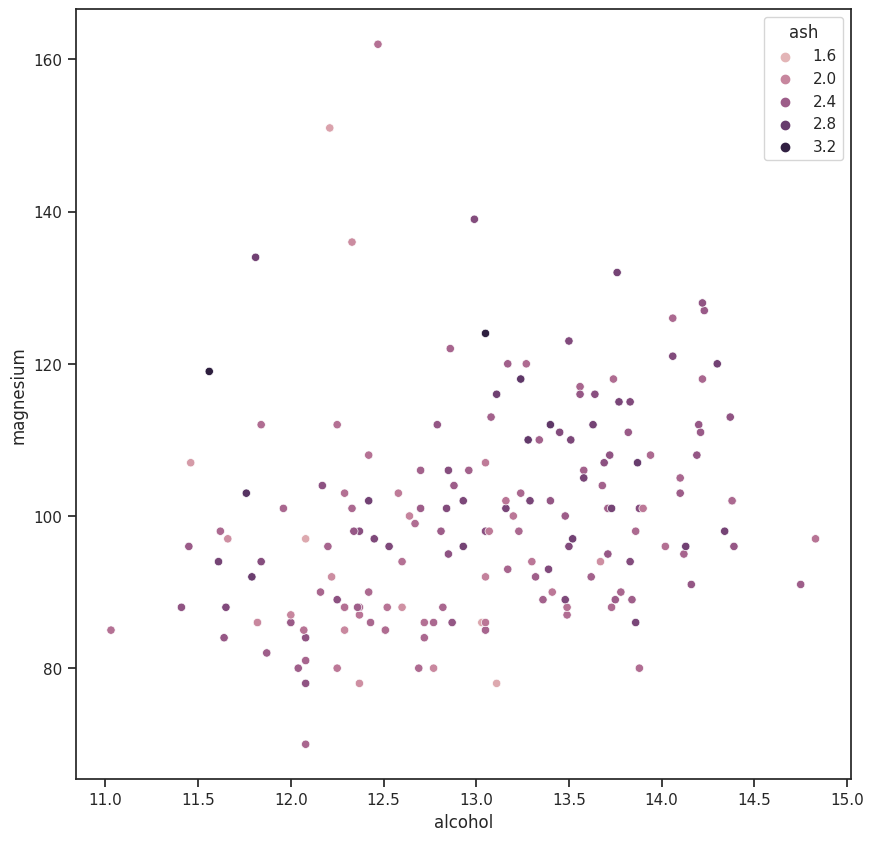

In [30]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='alcohol', y='magnesium', data=wine_df, hue='ash')

### **Гистограмма**

Позволяет оценить плотность вероятности распределения данных.

<ipython-input-31-0c268acb8e01>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_df['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

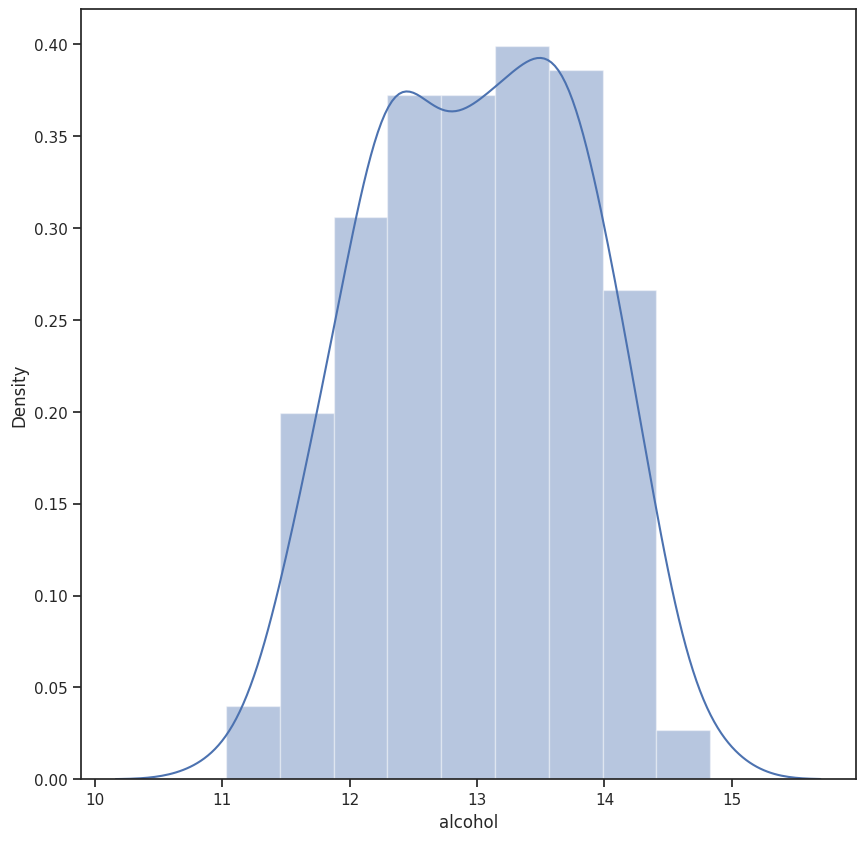

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(wine_df['alcohol'])

### **Jointplot**

Комбинация гистограмм и диаграмм рассеивания.

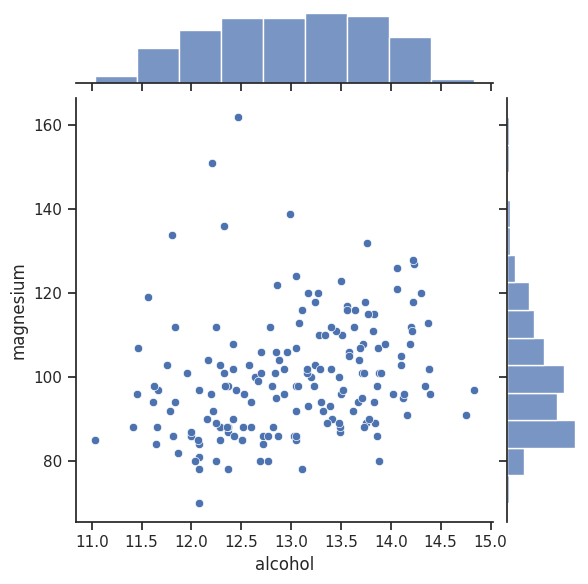

In [32]:
sns.jointplot(x='alcohol', y='magnesium', data=wine_df)

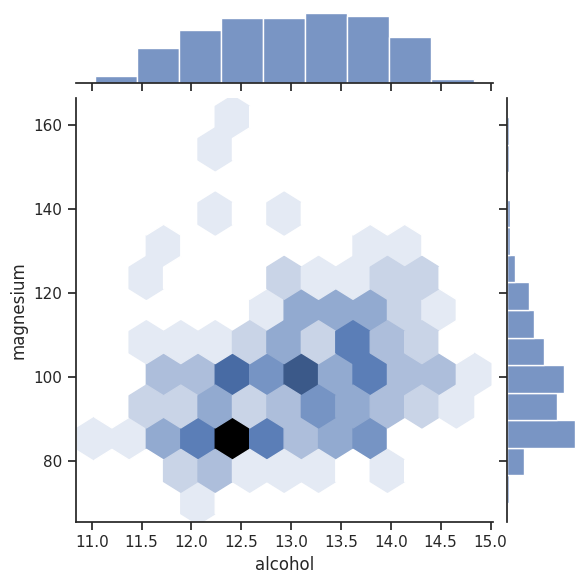

In [33]:
sns.jointplot(x='alcohol', y='magnesium', data=wine_df, kind="hex")

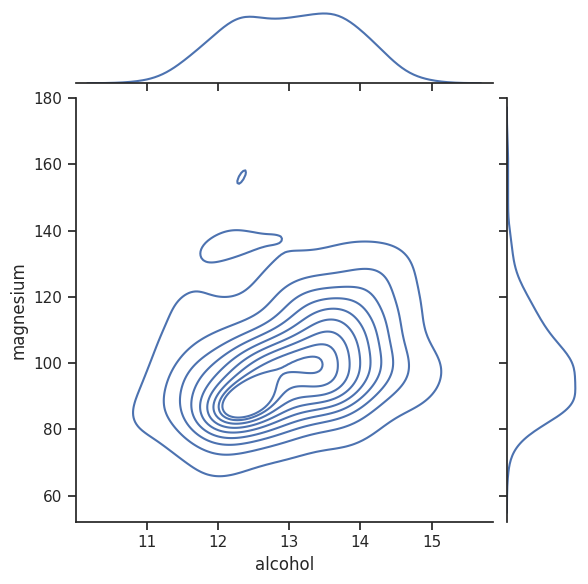

In [34]:
sns.jointplot(x='alcohol', y='magnesium', data=wine_df, kind="kde")

### **"Парные диаграммы"**

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

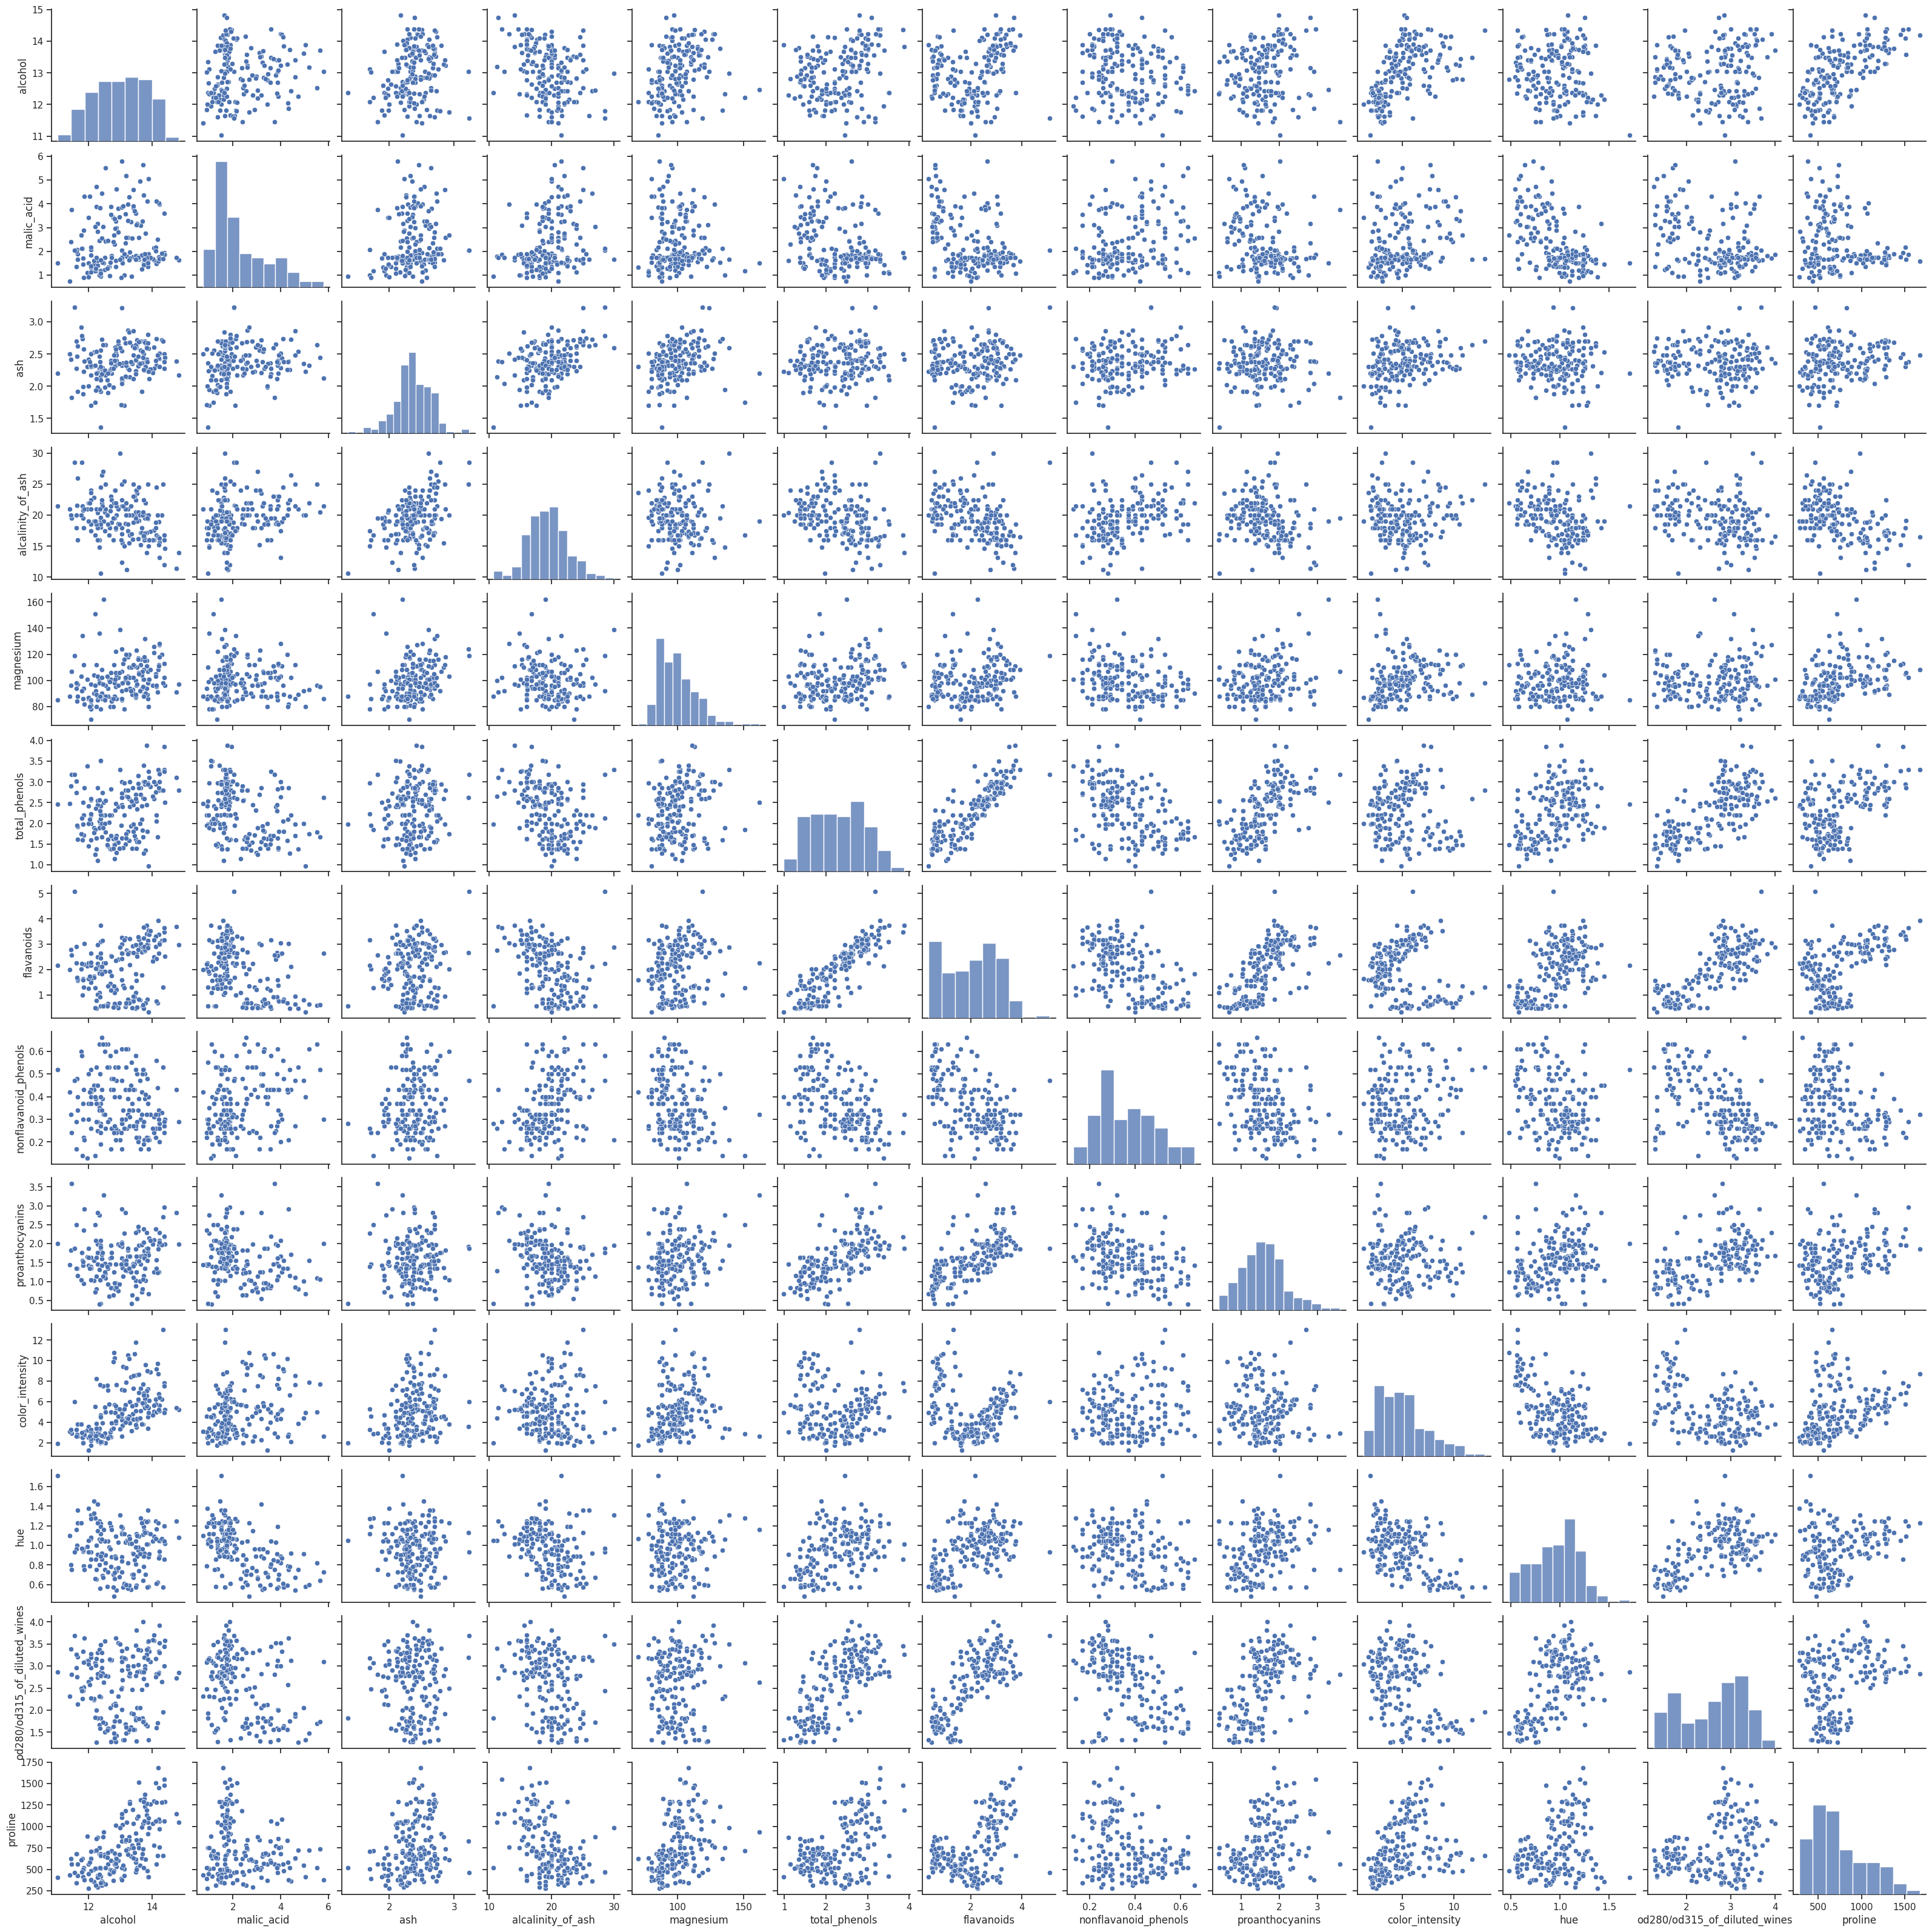

In [35]:
sns.pairplot(wine_df)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

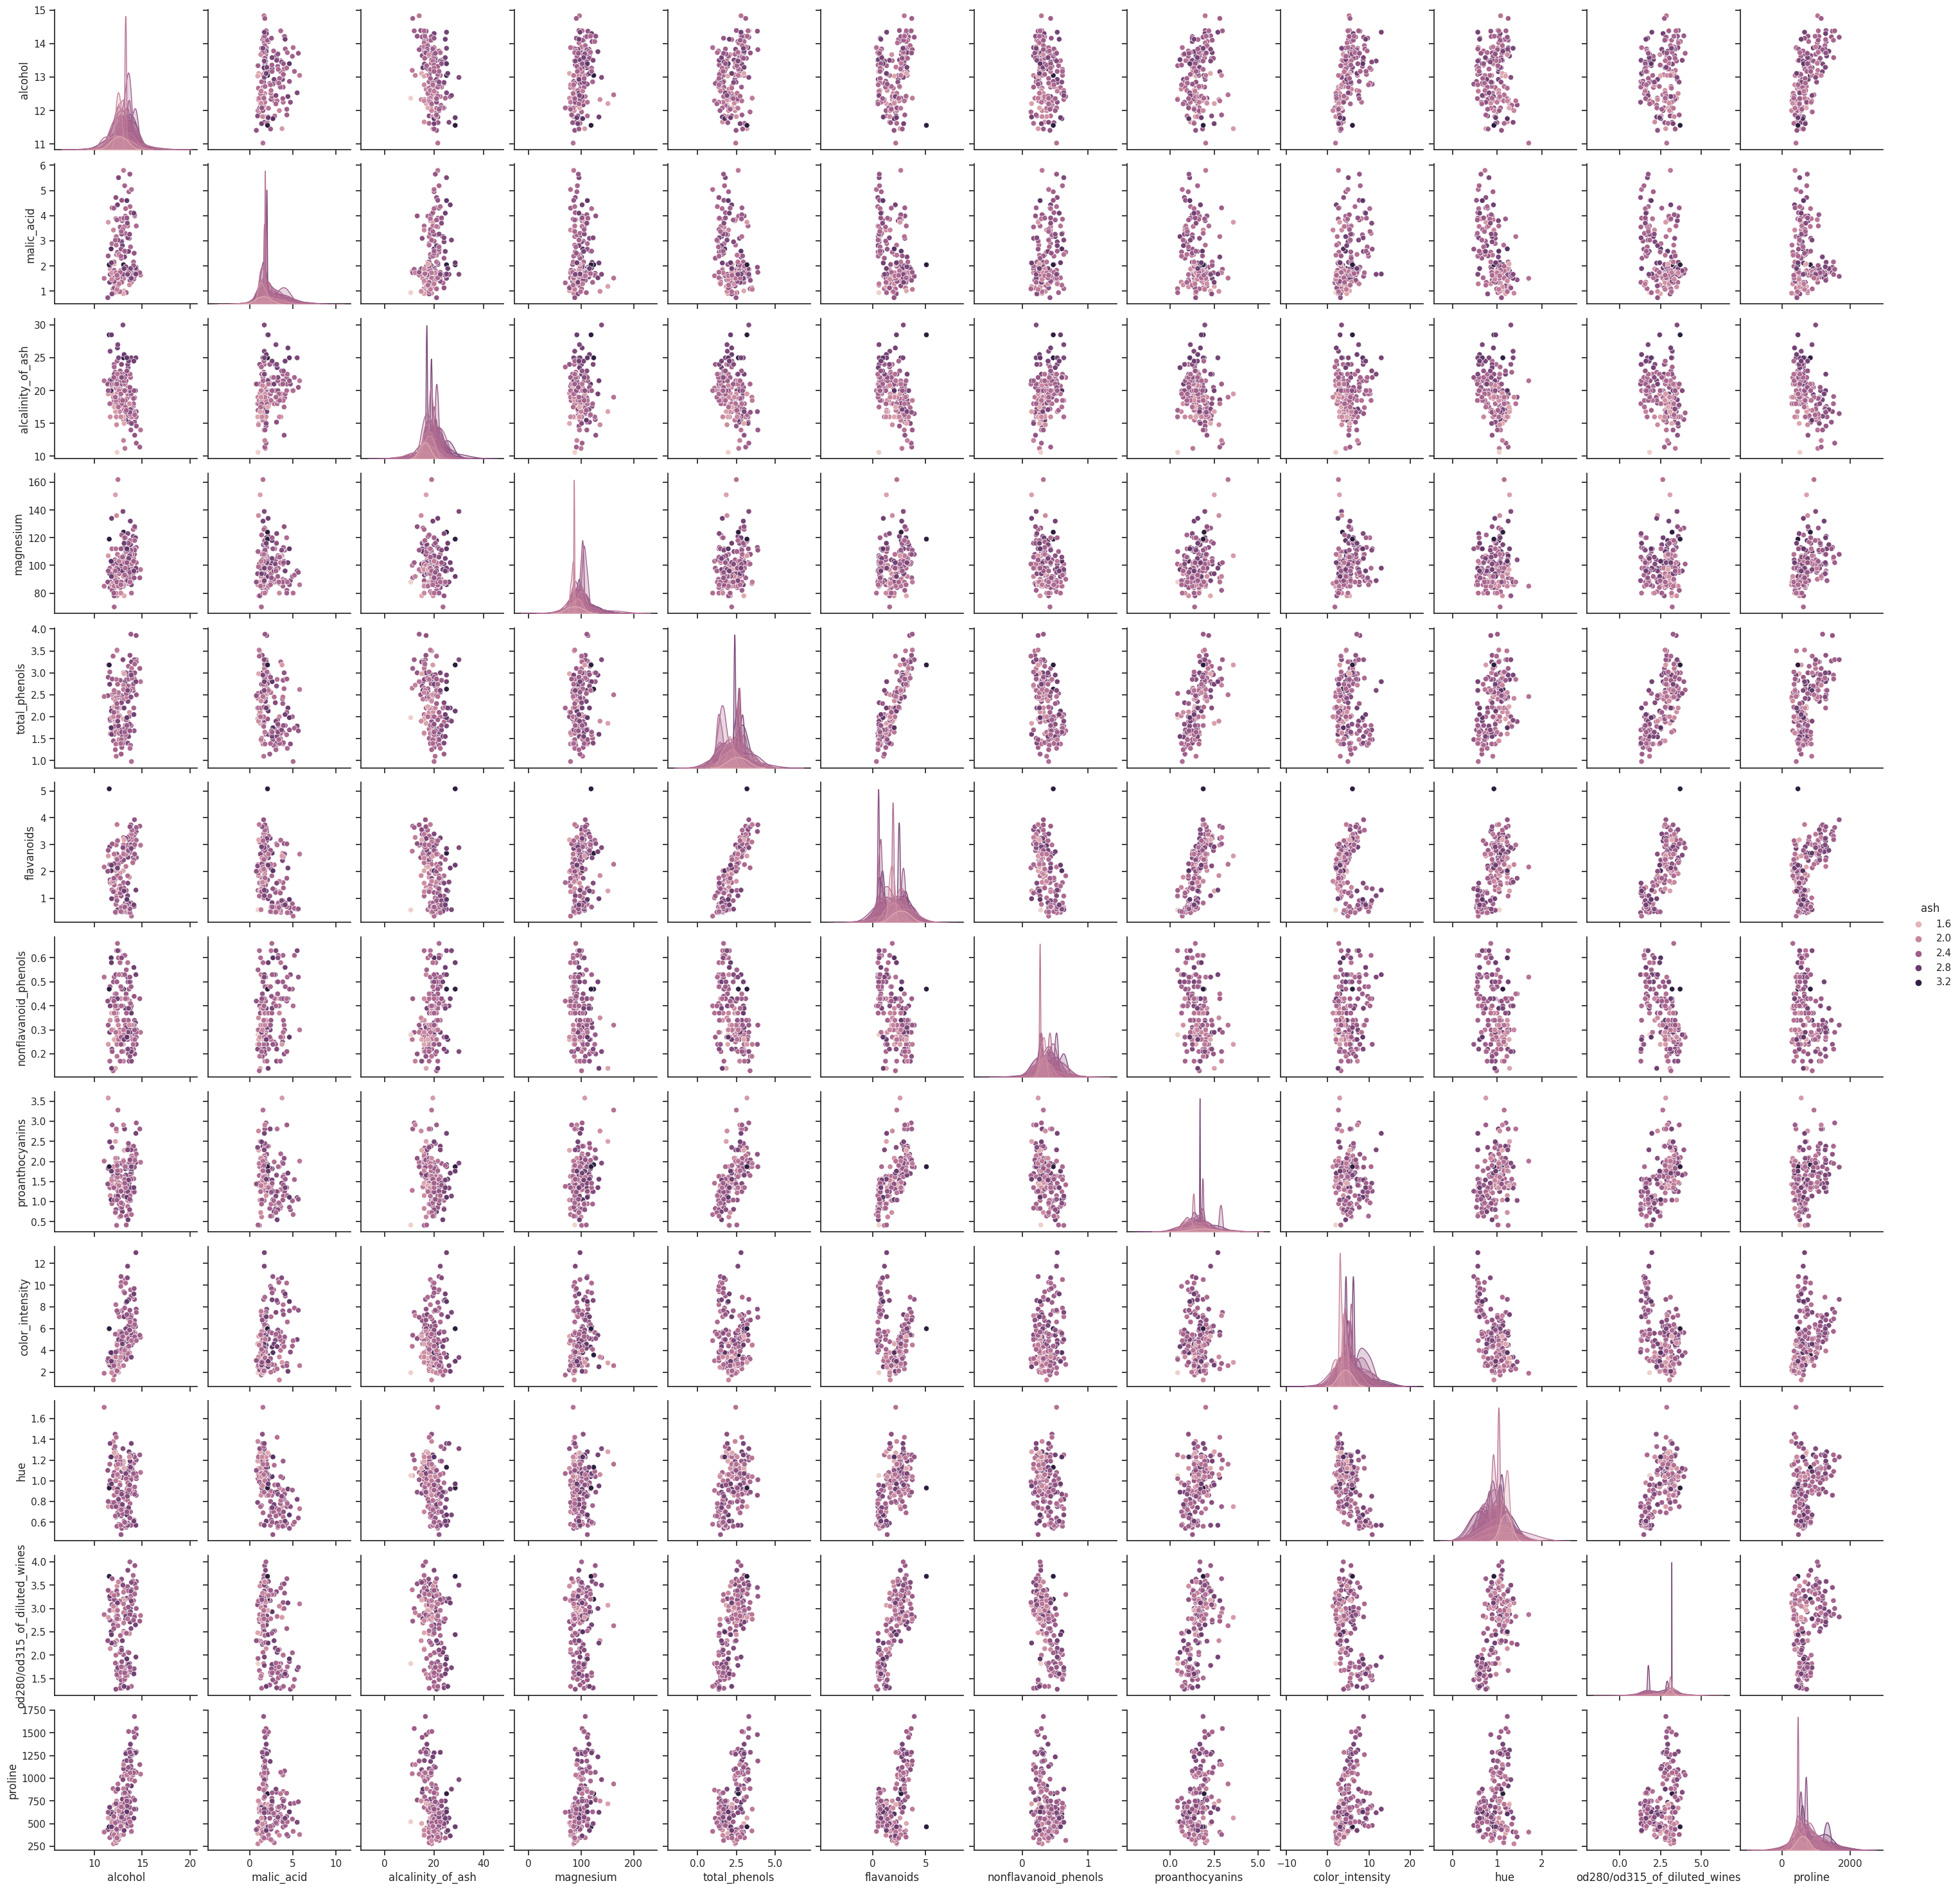

In [36]:
sns.pairplot(wine_df, hue="ash")

### **Ящик с усами**

Отображает одномерное распределение вероятности.

<Axes: xlabel='alcohol'>

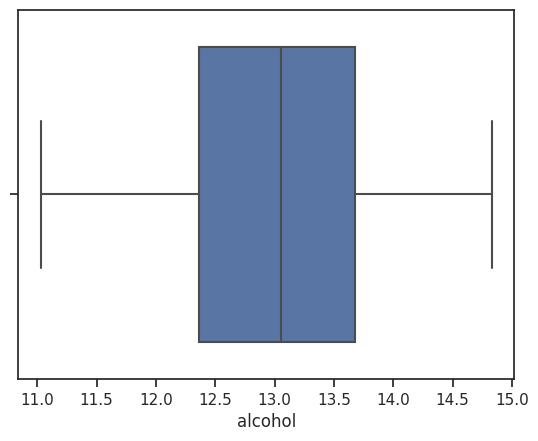

In [37]:
sns.boxplot(x=wine_df['alcohol'])

<Axes: ylabel='alcohol'>

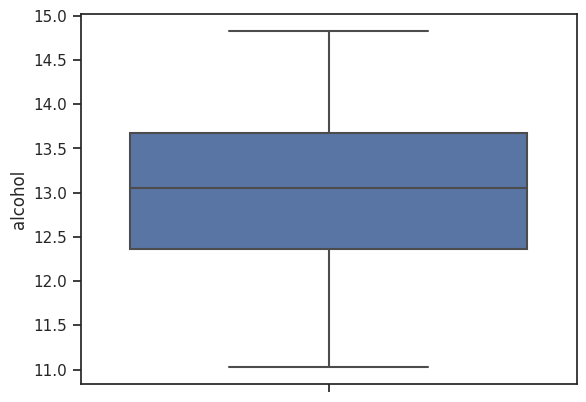

In [38]:
# По вертикали
sns.boxplot(y=wine_df['alcohol'])

<Axes: xlabel='ash', ylabel='alcohol'>

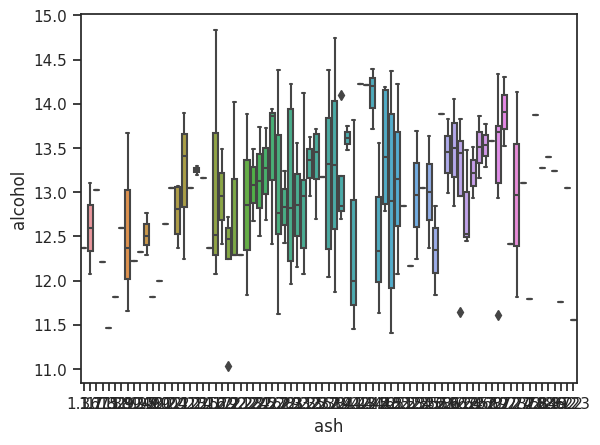

In [39]:
# Распределение параметра alcohol сгруппированные по ash.
sns.boxplot(x='ash', y='alcohol', data=wine_df)

### **Violin plot**

Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='alcohol'>

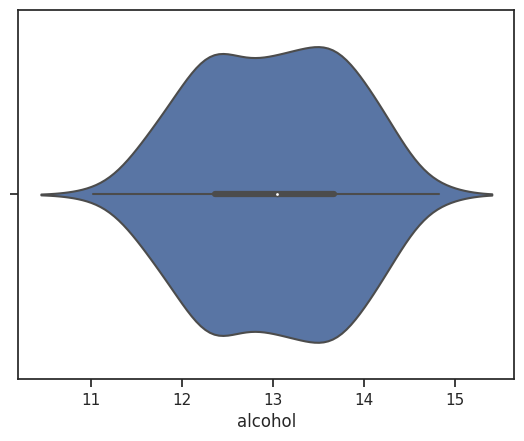

In [40]:
sns.violinplot(x=wine_df['alcohol'])

<ipython-input-41-b9c5e744cb77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_df['alcohol'], ax=ax[1])


<Axes: xlabel='alcohol', ylabel='Density'>

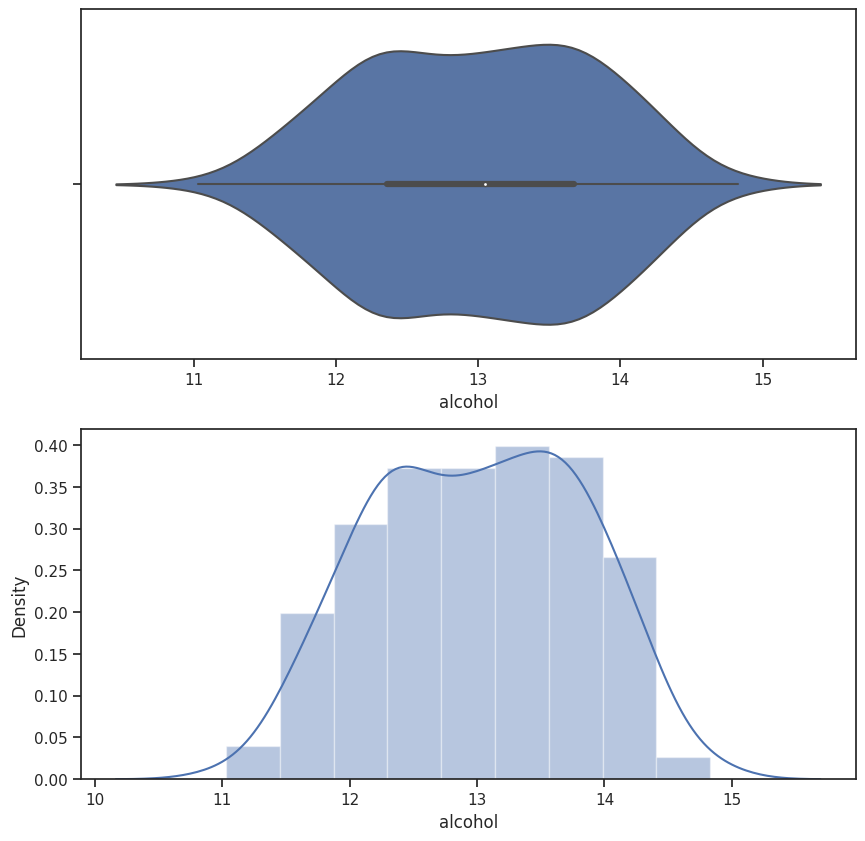

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=wine_df['alcohol'])
sns.distplot(wine_df['alcohol'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='ash', ylabel='alcohol'>

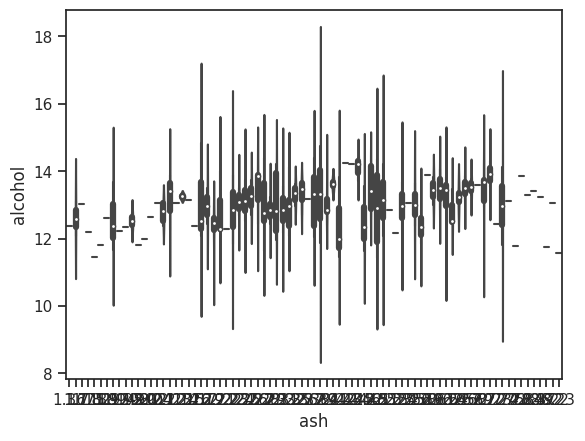

In [42]:
# Распределение параметра alcohol сгруппированные по ash.
sns.violinplot(x='ash', y='alcohol', data=wine_df)

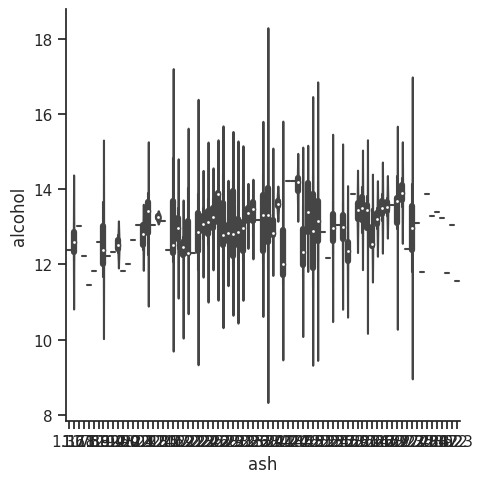

In [43]:
sns.catplot(y='alcohol', x='ash', data=wine_df, kind="violin", split=True)

### **4) Информация о корреляции признаков**

Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "ash"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.

Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [44]:
wine_df.corr()

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 
 
 
 
 alcohol 
 1.000000 
 0.094397 
 0.211545 
 -0.310235 
 0.270798 
 0.289101 
 0.236815 
 -0.155929 
 0.136698 
 0.546364 
 -0.071747 
 0.072343 
 0.643720 
 
 
 malic_acid 
 0.094397 
 1.000000 
 0.164045 
 0.288500 
 -0.054575 
 -0.335167 
 -0.411007 
 0.292977 
 -0.220746 
 0.248985 
 -0.561296 
 -0.368710 
 -0.192011 
 
 
 ash 
 0.211545 
 0.164045 
 1.000000 
 0.443367 
 0.286587 
 0.128980 
 0.115077 
 0.186230 
 0.009652 
 0.258887 
 -0.074667 
 0.003911 
 0.223626 
 
 
 alcalinity_of_ash 
 -0.310235 
 0.288500 
 0.443367 
 1.000000 
 -0.083333 
 -0.321113 
 -0.351370 
 0.361922 
 -0.197327 
 0.018732 
 -0.273955 
 -0.276769 
 -0.440597 
 
 
 magnesium 
 0.270798 
 -0.054575 
 0.286587 
 -0.083333 
 1.000000 
 0.214401 
 0.195784 
 -0.256294 
 0.236441 
 0.199950 
 0.055398 
 0.066004 
 0.393351 
 
 
 total_phenols 
 0.289101 
 -0.335167 
 0.128980 
 -0.321113 
 0.214401 
 1.000000 
 0.864564 
 -0.449935 
 0.612413 
 -0.055136 
 0.433681 
 0.699949 
 0.498115 
 
 
 flavanoids 
 0.236815 
 -0.411007 
 0.115077 
 -0.351370 
 0.195784 
 0.864564 
 1.000000 
 -0.537900 
 0.652692 
 -0.172379 
 0.543479 
 0.787194 
 0.494193 
 
 
 nonflavanoid_phenols 
 -0.155929 
 0.292977 
 0.186230 
 0.361922 
 -0.256294 
 -0.449935 
 -0.537900 
 1.000000 
 -0.365845 
 0.139057 
 -0.262640 
 -0.503270 
 -0.311385 
 
 
 proanthocyanins 
 0.136698 
 -0.220746 
 0.009652 
 -0.197327 
 0.236441 
 0.612413 
 0.652692 
 -0.365845 
 1.000000 
 -0.025250 
 0.295544 
 0.519067 
 0.330417 
 
 
 color_intensity 
 0.546364 
 0.248985 
 0.258887 
 0.018732 
 0.199950 
 -0.055136 
 -0.172379 
 0.139057 
 -0.025250 
 1.000000 
 -0.521813 
 -0.428815 
 0.316100 
 
 
 hue 
 -0.071747 
 -0.561296 
 -0.074667 
 -0.273955 
 0.055398 
 0.433681 
 0.543479 
 -0.262640 
 0.295544 
 -0.521813 
 1.000000 
 0.565468 
 0.236183 
 
 
 od280/od315_of_diluted_wines 
 0.072343 
 -0.368710 
 0.003911 
 -0.276769 
 0.066004 
 0.699949 
 0.787194 
 -0.503270 
 0.519067 
 -0.428815 
 0.565468 
 1.000000 
 0.312761 
 
 
 proline 
 0.643720 
 -0.192011 
 0.223626 
 -0.440597 
 0.393351 
 0.498115 
 0.494193 
 -0.311385 
 0.330417 
 0.316100 
 0.236183 
 0.312761 
 1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

- Флаваноиды наиболее сильно коррелируют с общим количеством фенолов (0.86), OD280/OD315 разбавленных вин (0.79) и проантоцианами (0.65). Эти признаки обязательно следует оставить в модели.
- Флаваноиды отчасти коррелируют с нефлановоидными фенолами (-0.54), пролином (0.49) и оттенком (0.54). Эти признаки стоит также оставить в модели.
- Флаваноиды слабо коррелируют с пепелом (0.11) и интенсивностью цвета (-0.17). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [45]:
wine_df.corr(method='pearson')

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 
 
 
 
 alcohol 
 1.000000 
 0.094397 
 0.211545 
 -0.310235 
 0.270798 
 0.289101 
 0.236815 
 -0.155929 
 0.136698 
 0.546364 
 -0.071747 
 0.072343 
 0.643720 
 
 
 malic_acid 
 0.094397 
 1.000000 
 0.164045 
 0.288500 
 -0.054575 
 -0.335167 
 -0.411007 
 0.292977 
 -0.220746 
 0.248985 
 -0.561296 
 -0.368710 
 -0.192011 
 
 
 ash 
 0.211545 
 0.164045 
 1.000000 
 0.443367 
 0.286587 
 0.128980 
 0.115077 
 0.186230 
 0.009652 
 0.258887 
 -0.074667 
 0.003911 
 0.223626 
 
 
 alcalinity_of_ash 
 -0.310235 
 0.288500 
 0.443367 
 1.000000 
 -0.083333 
 -0.321113 
 -0.351370 
 0.361922 
 -0.197327 
 0.018732 
 -0.273955 
 -0.276769 
 -0.440597 
 
 
 magnesium 
 0.270798 
 -0.054575 
 0.286587 
 -0.083333 
 1.000000 
 0.214401 
 0.195784 
 -0.256294 
 0.236441 
 0.199950 
 0.055398 
 0.066004 
 0.393351 
 
 
 total_phenols 
 0.289101 
 -0.335167 
 0.128980 
 -0.321113 
 0.214401 
 1.000000 
 0.864564 
 -0.449935 
 0.612413 
 -0.055136 
 0.433681 
 0.699949 
 0.498115 
 
 
 flavanoids 
 0.236815 
 -0.411007 
 0.115077 
 -0.351370 
 0.195784 
 0.864564 
 1.000000 
 -0.537900 
 0.652692 
 -0.172379 
 0.543479 
 0.787194 
 0.494193 
 
 
 nonflavanoid_phenols 
 -0.155929 
 0.292977 
 0.186230 
 0.361922 
 -0.256294 
 -0.449935 
 -0.537900 
 1.000000 
 -0.365845 
 0.139057 
 -0.262640 
 -0.503270 
 -0.311385 
 
 
 proanthocyanins 
 0.136698 
 -0.220746 
 0.009652 
 -0.197327 
 0.236441 
 0.612413 
 0.652692 
 -0.365845 
 1.000000 
 -0.025250 
 0.295544 
 0.519067 
 0.330417 
 
 
 color_intensity 
 0.546364 
 0.248985 
 0.258887 
 0.018732 
 0.199950 
 -0.055136 
 -0.172379 
 0.139057 
 -0.025250 
 1.000000 
 -0.521813 
 -0.428815 
 0.316100 
 
 
 hue 
 -0.071747 
 -0.561296 
 -0.074667 
 -0.273955 
 0.055398 
 0.433681 
 0.543479 
 -0.262640 
 0.295544 
 -0.521813 
 1.000000 
 0.565468 
 0.236183 
 
 
 od280/od315_of_diluted_wines 
 0.072343 
 -0.368710 
 0.003911 
 -0.276769 
 0.066004 
 0.699949 
 0.787194 
 -0.503270 
 0.519067 
 -0.428815 
 0.565468 
 1.000000 
 0.312761 
 
 
 proline 
 0.643720 
 -0.192011 
 0.223626 
 -0.440597 
 0.393351 
 0.498115 
 0.494193 
 -0.311385 
 0.330417 
 0.316100 
 0.236183 
 0.312761 
 1.000000

In [46]:
wine_df.corr(method='kendall')

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 
 
 
 
 alcohol 
 1.000000 
 0.093844 
 0.170154 
 -0.212978 
 0.250506 
 0.209099 
 0.191087 
 -0.109554 
 0.133526 
 0.434353 
 -0.021717 
 0.061513 
 0.449387 
 
 
 malic_acid 
 0.093844 
 1.000000 
 0.158178 
 0.210119 
 0.050869 
 -0.174929 
 -0.211918 
 0.175129 
 -0.168714 
 0.195607 
 -0.388707 
 -0.162909 
 -0.044660 
 
 
 ash 
 0.170154 
 0.158178 
 1.000000 
 0.258352 
 0.254246 
 0.089855 
 0.049474 
 0.098937 
 0.018240 
 0.187786 
 -0.037234 
 -0.006341 
 0.171574 
 
 
 alcalinity_of_ash 
 -0.212978 
 0.210119 
 0.258352 
 1.000000 
 -0.121005 
 -0.256669 
 -0.309865 
 0.278091 
 -0.171404 
 -0.057281 
 -0.239210 
 -0.226253 
 -0.313218 
 
 
 magnesium 
 0.250506 
 0.050869 
 0.254246 
 -0.121005 
 1.000000 
 0.172195 
 0.161603 
 -0.158361 
 0.117871 
 0.241781 
 0.023760 
 0.034307 
 0.343016 
 
 
 total_phenols 
 0.209099 
 -0.174929 
 0.089855 
 -0.256669 
 0.172195 
 1.000000 
 0.701999 
 -0.310443 
 0.466517 
 0.028264 
 0.289210 
 0.478267 
 0.280203 
 
 
 flavanoids 
 0.191087 
 -0.211918 
 0.049474 
 -0.309865 
 0.161603 
 0.701999 
 1.000000 
 -0.378099 
 0.534615 
 0.028674 
 0.354372 
 0.520448 
 0.263661 
 
 
 nonflavanoid_phenols 
 -0.109554 
 0.175129 
 0.098937 
 0.278091 
 -0.158361 
 -0.310443 
 -0.378099 
 1.000000 
 -0.269189 
 0.036065 
 -0.179755 
 -0.363787 
 -0.174108 
 
 
 proanthocyanins 
 0.133526 
 -0.168714 
 0.018240 
 -0.171404 
 0.117871 
 0.466517 
 0.534615 
 -0.269189 
 1.000000 
 -0.014962 
 0.231071 
 0.369104 
 0.204172 
 
 
 color_intensity 
 0.434353 
 0.195607 
 0.187786 
 -0.057281 
 0.241781 
 0.028264 
 0.028674 
 0.036065 
 -0.014962 
 1.000000 
 -0.291561 
 -0.206046 
 0.316632 
 
 
 hue 
 -0.021717 
 -0.388707 
 -0.037234 
 -0.239210 
 0.023760 
 0.289210 
 0.354372 
 -0.179755 
 0.231071 
 -0.291561 
 1.000000 
 0.324678 
 0.143508 
 
 
 od280/od315_of_diluted_wines 
 0.061513 
 -0.162909 
 -0.006341 
 -0.226253 
 0.034307 
 0.478267 
 0.520448 
 -0.363787 
 0.369104 
 -0.206046 
 0.324678 
 1.000000 
 0.151559 
 
 
 proline 
 0.449387 
 -0.044660 
 0.171574 
 -0.313218 
 0.343016 
 0.280203 
 0.263661 
 -0.174108 
 0.204172 
 0.316632 
 0.143508 
 0.151559 
 1.000000

In [48]:
wine_df.corr(method='spearman')

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 
 
 
 
 alcohol 
 1.000000 
 0.140430 
 0.243722 
 -0.306598 
 0.365503 
 0.310920 
 0.294740 
 -0.162207 
 0.192734 
 0.635425 
 -0.024203 
 0.103050 
 0.633580 
 
 
 malic_acid 
 0.140430 
 1.000000 
 0.230674 
 0.304069 
 0.080188 
 -0.280225 
 -0.325202 
 0.255236 
 -0.244825 
 0.290307 
 -0.560265 
 -0.255185 
 -0.057466 
 
 
 ash 
 0.243722 
 0.230674 
 1.000000 
 0.366374 
 0.361488 
 0.132193 
 0.078796 
 0.145583 
 0.024384 
 0.283047 
 -0.050183 
 -0.007500 
 0.253163 
 
 
 alcalinity_of_ash 
 -0.306598 
 0.304069 
 0.366374 
 1.000000 
 -0.169558 
 -0.376657 
 -0.443770 
 0.389390 
 -0.253695 
 -0.073776 
 -0.352507 
 -0.325890 
 -0.456090 
 
 
 magnesium 
 0.365503 
 0.080188 
 0.361488 
 -0.169558 
 1.000000 
 0.246417 
 0.233167 
 -0.236786 
 0.173647 
 0.357029 
 0.036095 
 0.056963 
 0.507575 
 
 
 total_phenols 
 0.310920 
 -0.280225 
 0.132193 
 -0.376657 
 0.246417 
 1.000000 
 0.879404 
 -0.448013 
 0.666689 
 0.011162 
 0.439457 
 0.687207 
 0.419470 
 
 
 flavanoids 
 0.294740 
 -0.325202 
 0.078796 
 -0.443770 
 0.233167 
 0.879404 
 1.000000 
 -0.543897 
 0.730322 
 -0.042910 
 0.535430 
 0.741533 
 0.429904 
 
 
 nonflavanoid_phenols 
 -0.162207 
 0.255236 
 0.145583 
 0.389390 
 -0.236786 
 -0.448013 
 -0.543897 
 1.000000 
 -0.384629 
 0.059639 
 -0.267813 
 -0.494950 
 -0.270112 
 
 
 proanthocyanins 
 0.192734 
 -0.244825 
 0.024384 
 -0.253695 
 0.173647 
 0.666689 
 0.730322 
 -0.384629 
 1.000000 
 -0.030947 
 0.342795 
 0.554031 
 0.308249 
 
 
 color_intensity 
 0.635425 
 0.290307 
 0.283047 
 -0.073776 
 0.357029 
 0.011162 
 -0.042910 
 0.059639 
 -0.030947 
 1.000000 
 -0.418522 
 -0.317516 
 0.457096 
 
 
 hue 
 -0.024203 
 -0.560265 
 -0.050183 
 -0.352507 
 0.036095 
 0.439457 
 0.535430 
 -0.267813 
 0.342795 
 -0.418522 
 1.000000 
 0.485454 
 0.207740 
 
 
 od280/od315_of_diluted_wines 
 0.103050 
 -0.255185 
 -0.007500 
 -0.325890 
 0.056963 
 0.687207 
 0.741533 
 -0.494950 
 0.554031 
 -0.317516 
 0.485454 
 1.000000 
 0.253266 
 
 
 proline 
 0.633580 
 -0.057466 
 0.253163 
 -0.456090 
 0.507575 
 0.419470 
 0.429904 
 -0.270112 
 0.308249 
 0.457096 
 0.207740 
 0.253266 
 1.000000

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

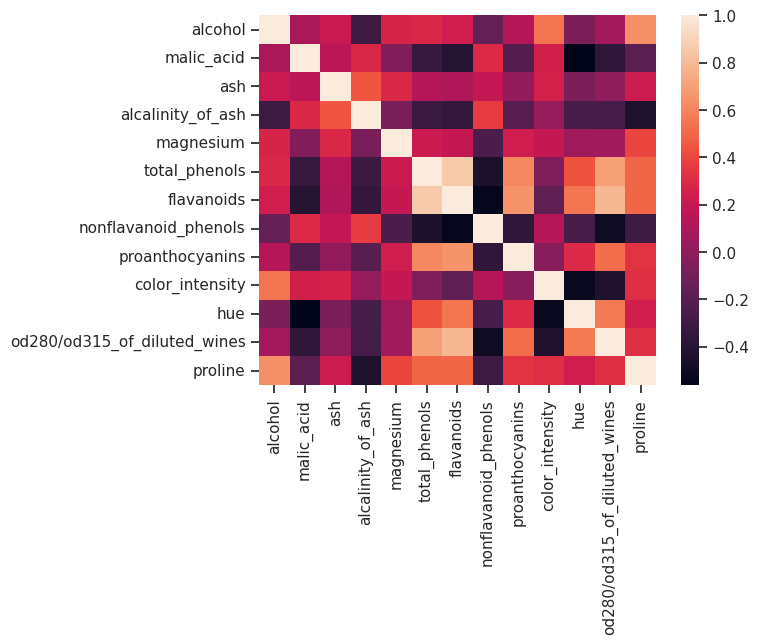

In [49]:
sns.heatmap(wine_df.corr())

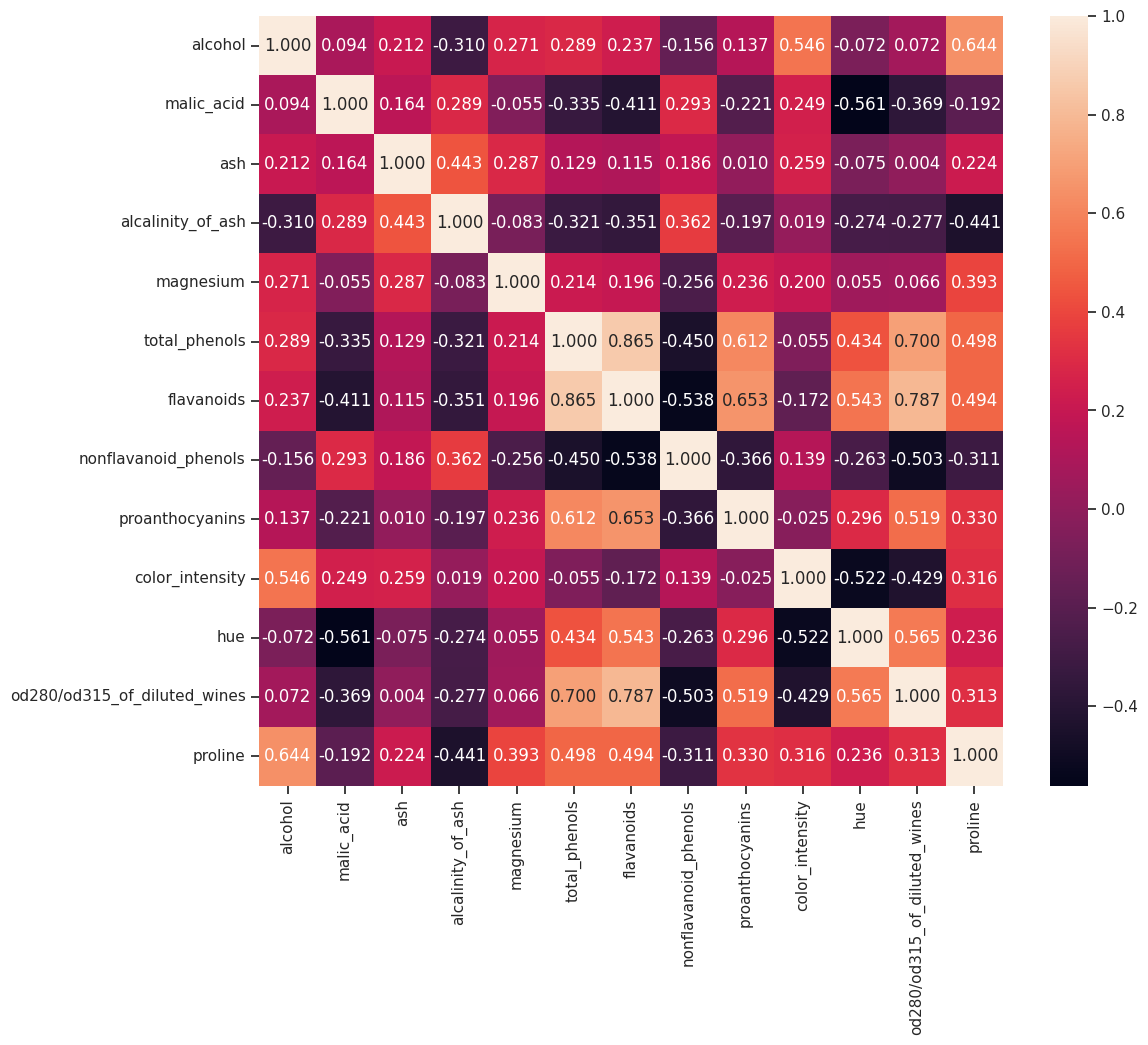

In [51]:
# Вывод значений в ячейках
plt.figure(figsize=(12, 10)) # Устанавливаем размер фигуры
sns.heatmap(wine_df.corr(), annot=True, fmt='.3f')
plt.show()

При тренировке модели следует выбрать один из двух признаков, наиболее коррелирующих с целевым flavanoids: total_phenols (0,865) и od280/od315_of_diluted_wines (0,787). Одновременно вдвоем их использовать нельзя для тренировки, так как они также сильно коррелируют между собой (0,7).

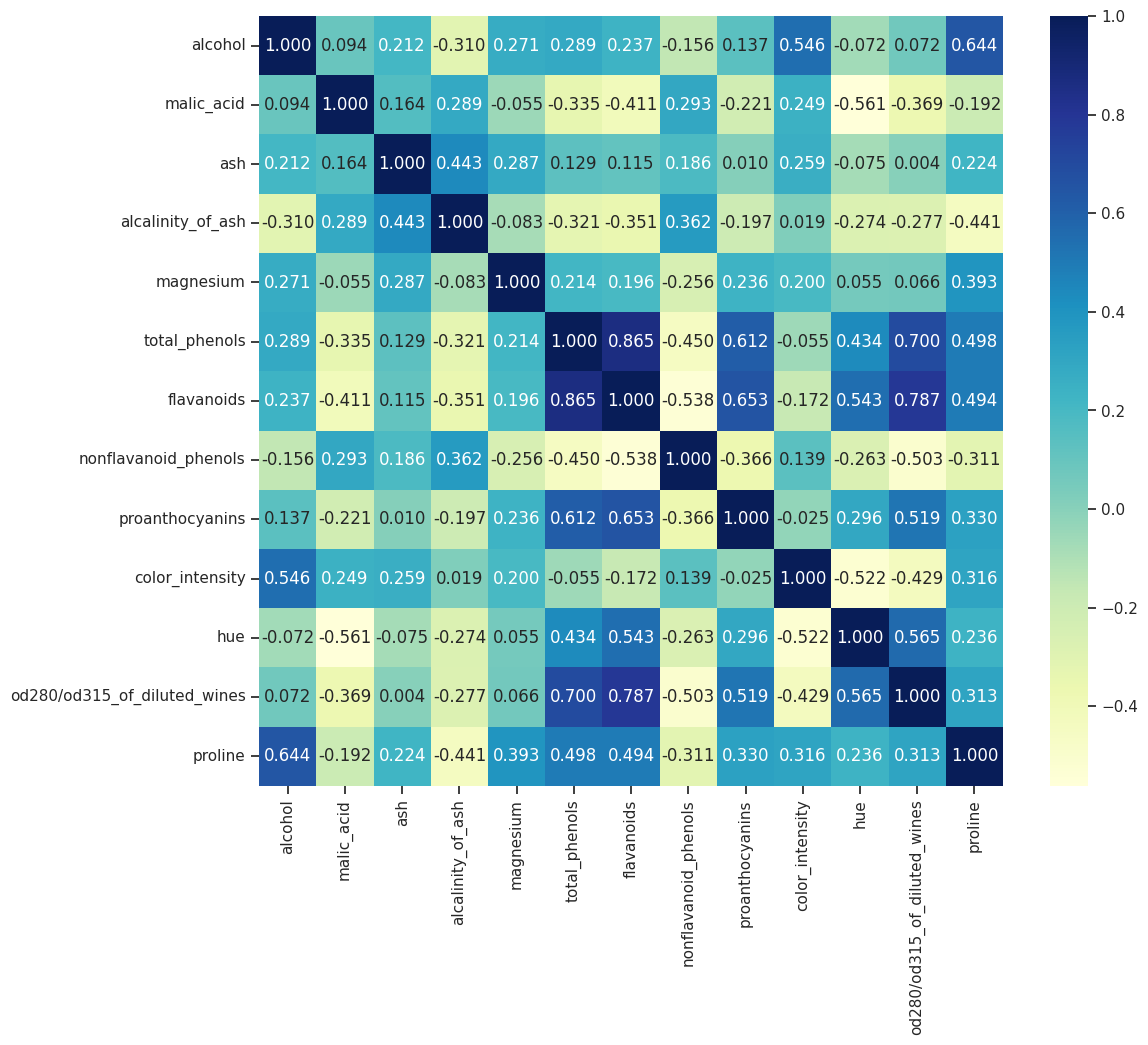

In [52]:
# Изменение цветовой гаммы
plt.figure(figsize=(12, 10))
sns.heatmap(wine_df.corr(), cmap='YlGnBu', annot=True, fmt='.3f')
plt.show()

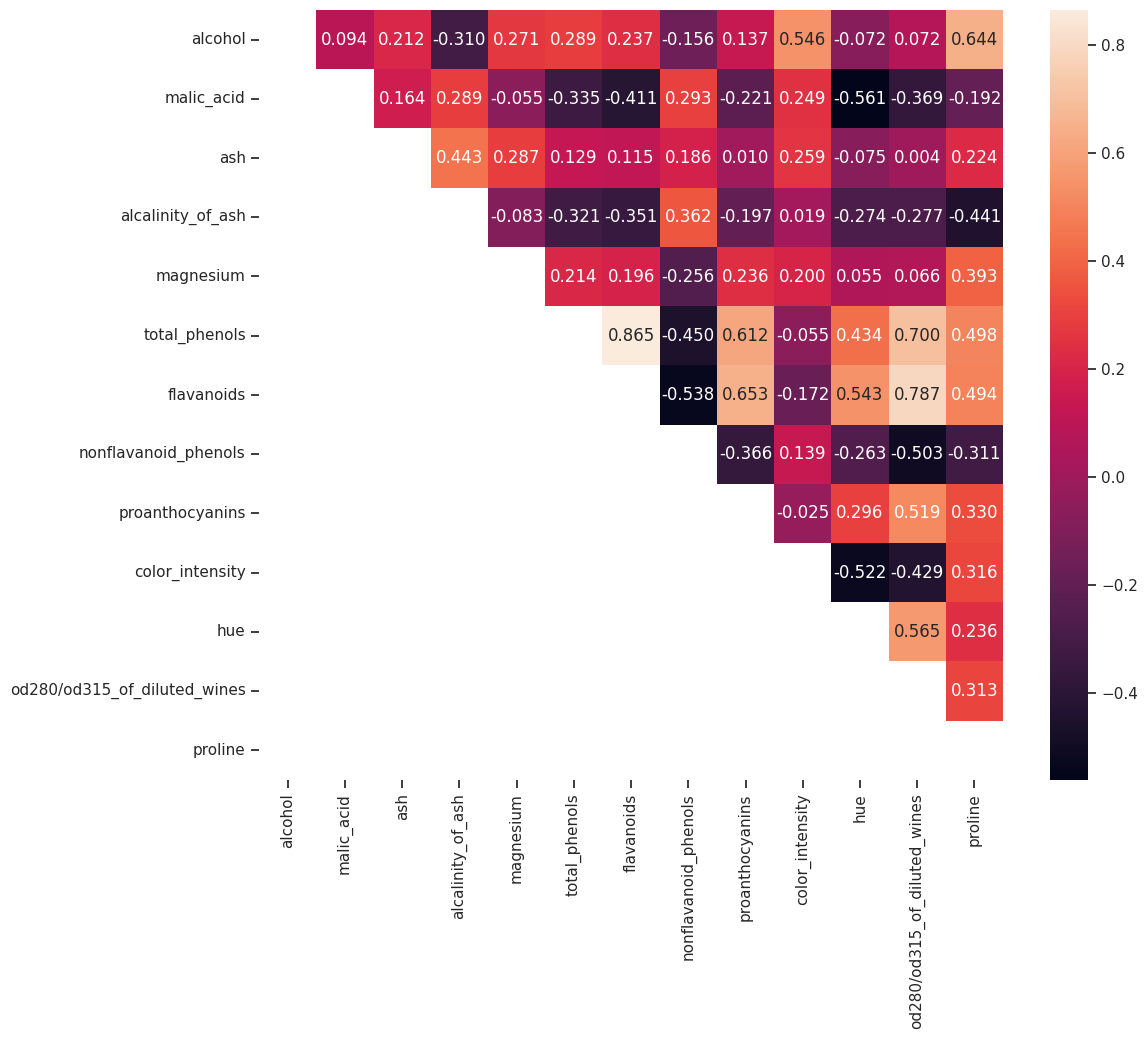

In [54]:
# Треугольный вариант матрицы
plt.figure(figsize=(12, 10))
mask = np.zeros_like(wine_df.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(wine_df.corr(), mask=mask, annot=True, fmt='.3f')
plt.show()

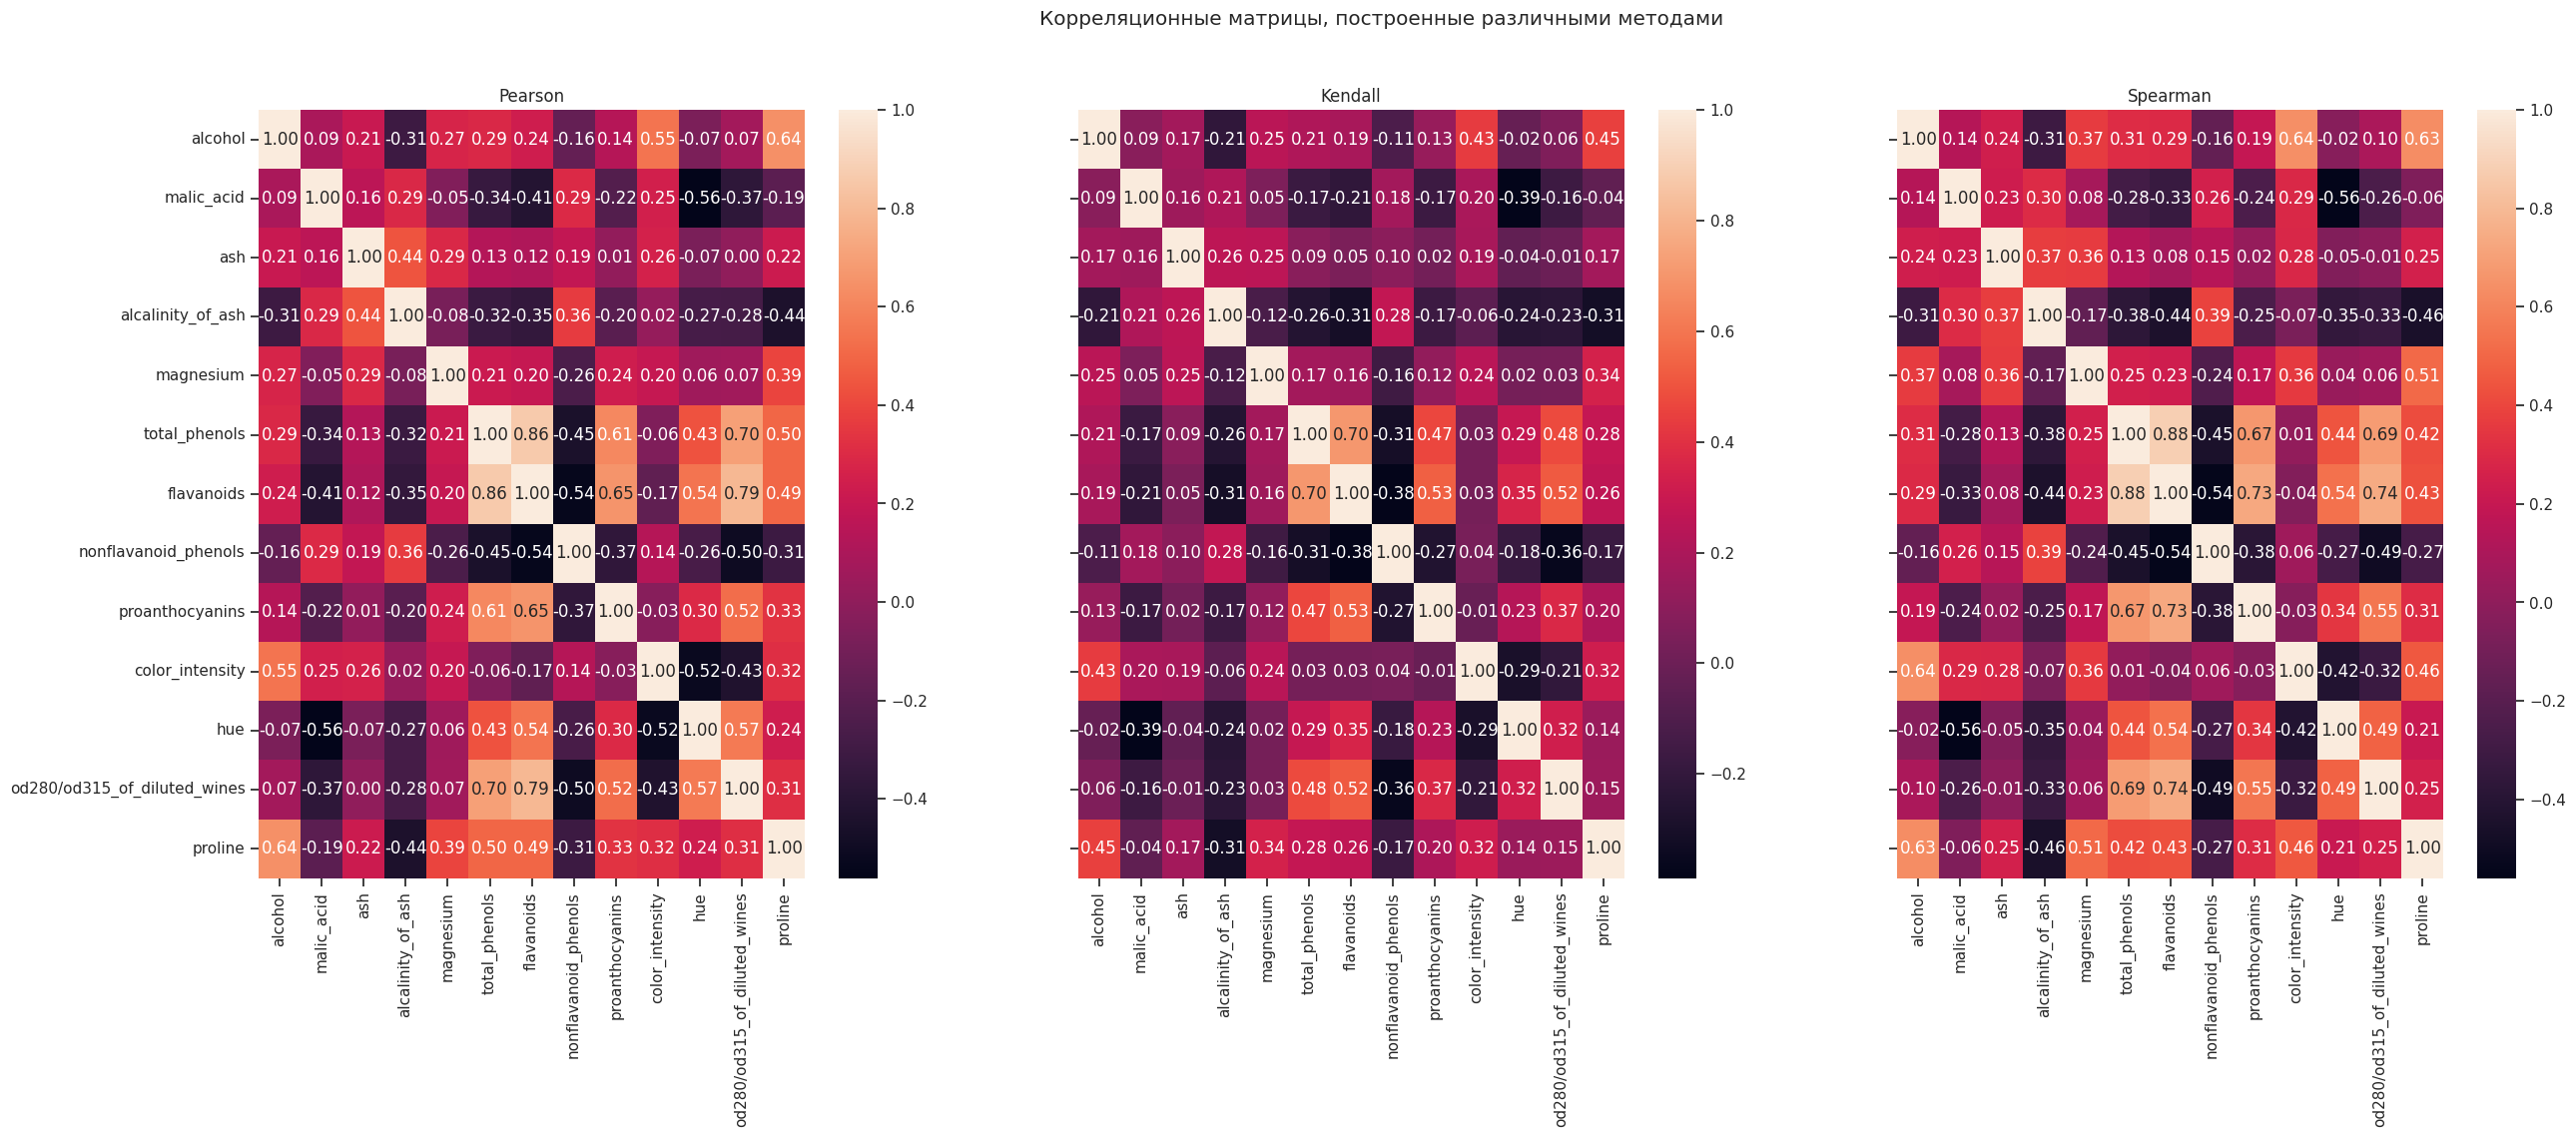

In [58]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(30,10))
sns.heatmap(wine_df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(wine_df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(wine_df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### **Тепловая карта с указание размера**

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html.
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<Axes: >

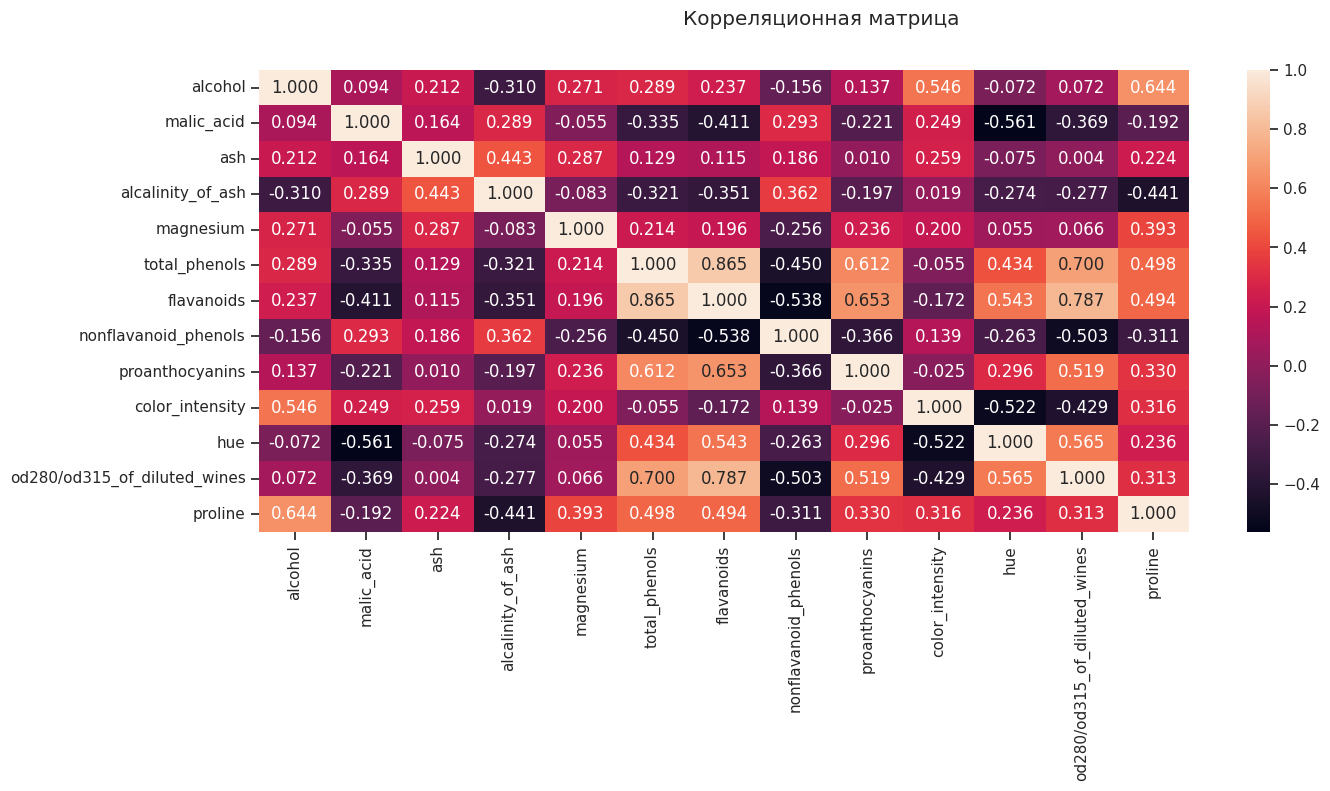

In [61]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,6))
fig.suptitle('Корреляционная матрица')
sns.heatmap(wine_df.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой. В реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" Solar correlation map.

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:

https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations

https://www.mtab.com/the-puzzle-of-visualizing-correlations/